In [237]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def grad_rosenbrock(x, y, a=1, b=100):
    dfdx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dfdy = 2 * b * (y - x**2)
    return np.array([dfdx, dfdy])


print(plt.style.available) #para colores

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


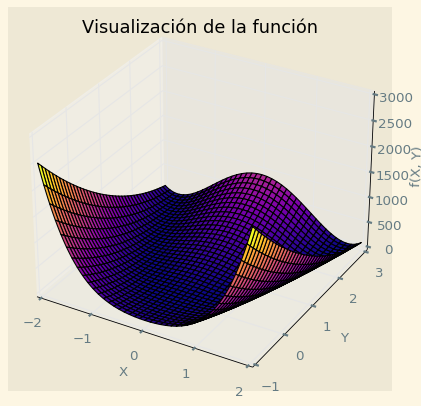

In [238]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure()
plt.style.use('Solarize_Light2') #style :)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Visualización de la función')
plt.show()

In [239]:
def gradient_descent(f, grad_f, start, learning_rate, tol=1e-8, max_iter=10000, a=1, b=100):
    x = np.array(start, dtype=float)
    trajectory = [x.copy()]
    eta = learning_rate #a explorar
    prev_value = f(x[0], x[1], a, b)

    for i in range(max_iter):
        grad = grad_f(x[0], x[1], a, b)
        grad_norm = np.linalg.norm(grad)#limito el tamaño del gradiente para evitar explosiones
        
        #????????
        """
        if grad_norm > 1e4:
            grad = grad / grad_norm * 1e4
        """

        x -= eta * grad
        trajectory.append(x.copy())

        """
        current_value = f(x[0], x[1], a, b)
        # Si el valor aumenta, reduce la tasa de aprendizaje
        if current_value > prev_value:
            eta *= 0.5
            print(f"Tasa de aprendizaje reducida a {eta:.5e} en iteración {i}.")
        prev_value = current_value
        """
        #CONVERGENCIA
        if grad_norm < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
            break
    if grad_norm < tol:    
        print(f"Convergencia alcanzada en {i + 1} iteraciones. Tasa de aprendizaje final: {eta:.5f}")
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return x, np.array(trajectory)


In [ ]:
def plot_trajectory(trajectory, a=1, b=100):

    plt.style.use('Solarize_Light2') #style :)
    
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y, a, b)

    #POSIBLES COLORES: plasma, PiYG, twilight, twilight_reverse
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(X, Y, Z, levels=50, cmap="plasma", alpha=0.85)
    cbar = plt.colorbar(contour)
    cbar.set_label("Valor de $f(x, y)$", fontsize=12)

    #TRAYECTORIA
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'w.-', linewidth=2, markersize=8, label="Trayectoria")
    
    #F0 Ff
    plt.scatter(trajectory[0, 0], trajectory[0, 1], color='cyan', edgecolor='black', s=100, label="Inicio")
    plt.annotate("Inicio", (trajectory[0, 0], trajectory[0, 1]), textcoords="offset points", xytext=(-30, 10), fontsize=10, color="cyan", ha="center")
    
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='orange', edgecolor='black', s=100, label="Final")
    plt.annotate("Final", (trajectory[-1, 0], trajectory[-1, 1]), textcoords="offset points", xytext=(30, -10), fontsize=10, color="orange", ha="center")
    
    plt.title("Trayectoria del Gradiente Descendente en la Función de Rosenbrock", fontsize=14, fontweight='bold')
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("$y$", fontsize=12)
    

    #plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.legend(loc="upper left", fontsize=20)
    

    plt.tight_layout()
    plt.show()


Tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99235584 0.98473938]
Valor de la función en el punto final: 5.852760790128446e-05


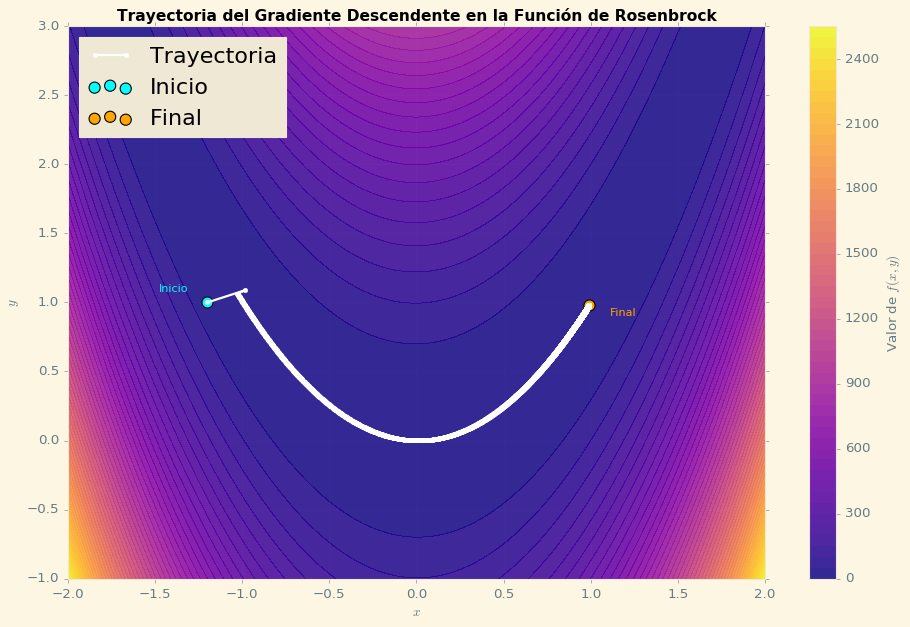


Tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [1.02014439 1.04077421]
Valor de la función en el punto final: 0.00040643060794333055


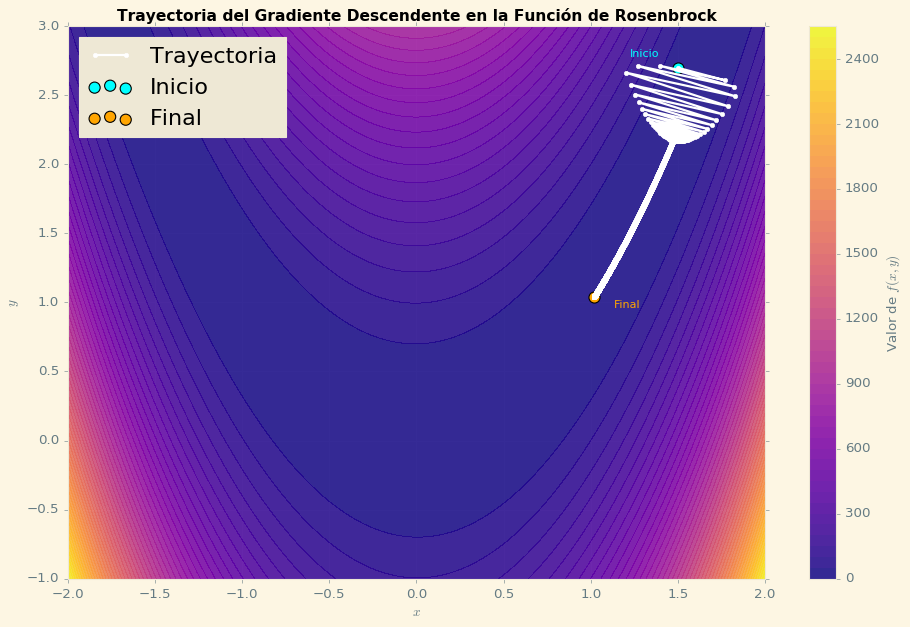


Tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99440095 0.98881076]
Valor de la función en el punto final: 3.139992492505519e-05


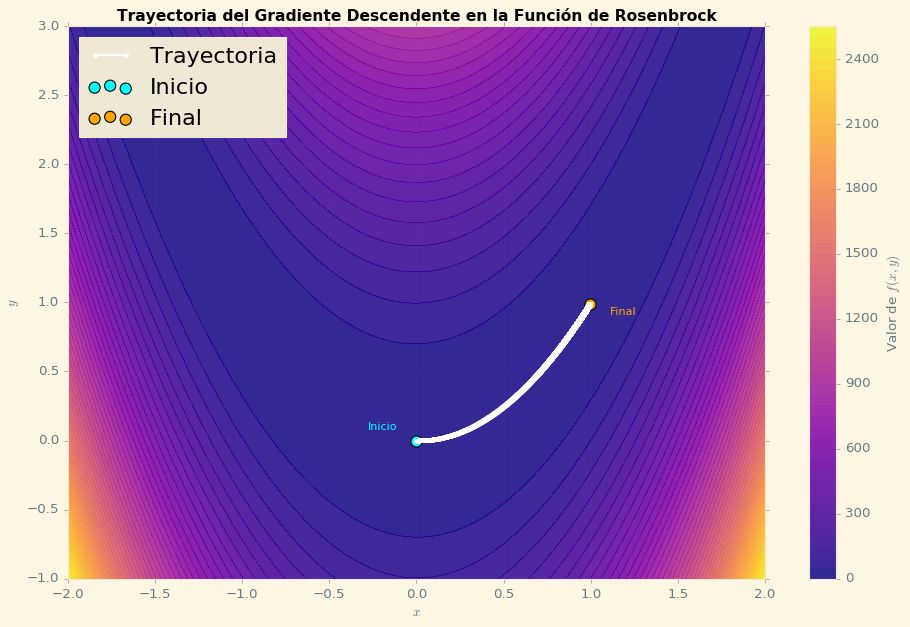


Tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99456494 0.9891376 ]
Valor de la función en el punto final: 2.958751146572048e-05


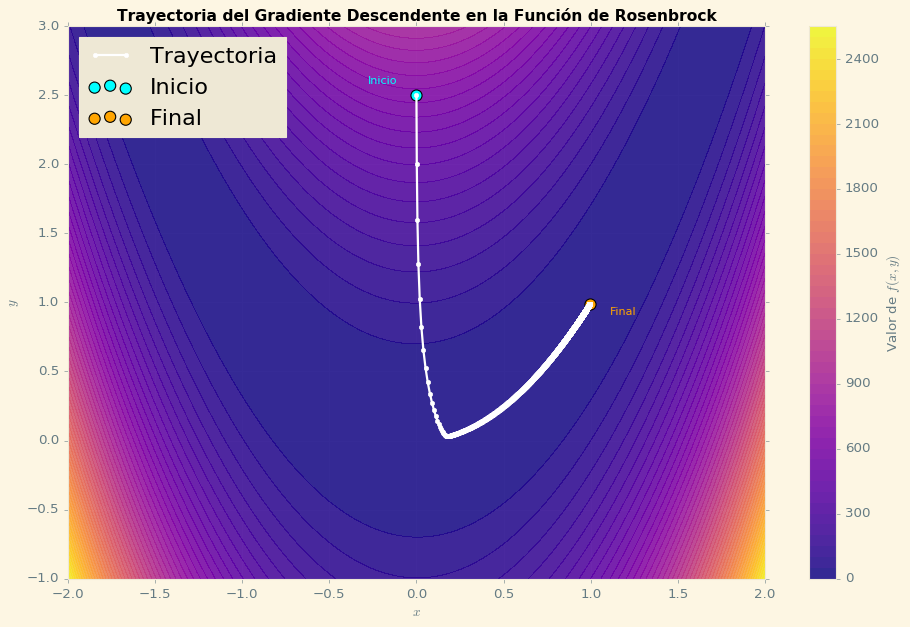


Tasa de aprendizaje: 0.01
No se alcanzó la convergencia en el número máximo de iteraciones.
Punto final estimado: [0.99454561 0.98909908]
Valor de la función en el punto final: 2.9798284371687116e-05


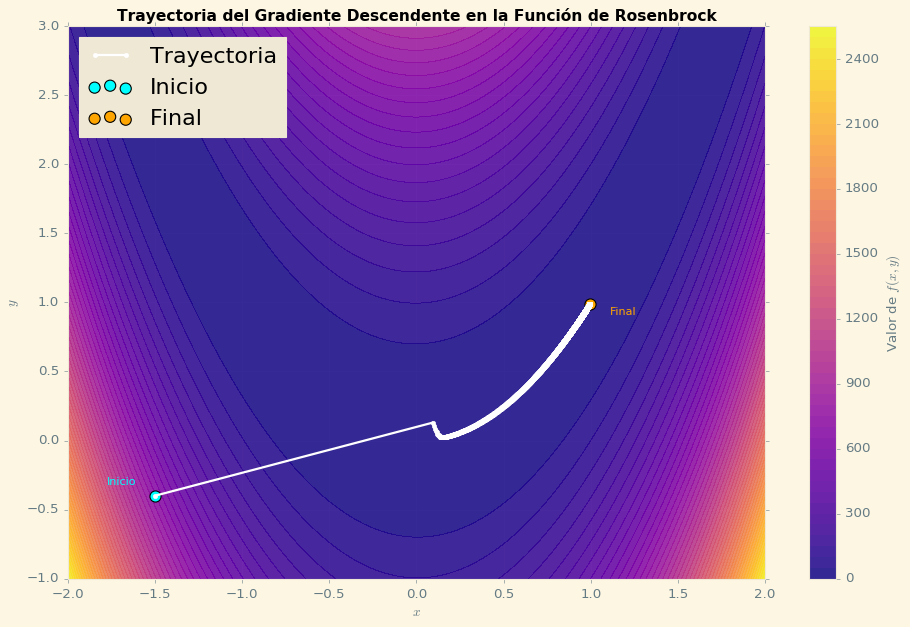

In [ ]:
start_point = [(-1.2, 1), (1.5,2.7), (0,0), (0,2.5), (-1.5,-0.4)]  #CI
learning_rates = [0.001, 0.01, 0.1, 1]  #S_{k}

for s_p in start_point:
    print(f"\nTasa de aprendizaje: {0.01}")
    final_point, trajectory = gradient_descent(rosenbrock, grad_rosenbrock, s_p, learning_rate=0.001)
    print(f"Punto final estimado: {final_point}")
    print(f"Valor de la función en el punto final: {rosenbrock(final_point[0], final_point[1])}")
    plot_trajectory(trajectory)